<a href="https://colab.research.google.com/github/tanishhshahh/saas/blob/master/Titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import keras

In [3]:
from keras.models import Sequential
from keras.layers import Dense

In [4]:
import pandas as pd

In [38]:
df=pd.read_csv("/content/train.csv")

In [39]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [40]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [42]:
import seaborn as sns

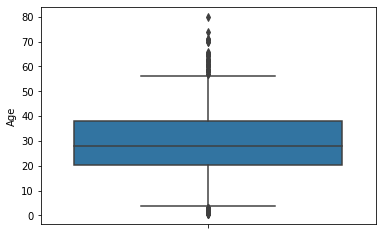

In [43]:
sns.boxplot(y=df["Age"],whis=[5,95])

In [44]:
df["Age"].median()

28.0

In [45]:
df.fillna({"Age":28},inplace=True)

In [46]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
df=df.drop(["Embarked","Cabin","PassengerId","Name","Ticket"],axis="columns")

In [48]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,28.0,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [51]:
y=df["Survived"]

In [53]:
x=df.drop("Survived",axis="columns")

In [55]:
x=pd.get_dummies(x,columns=["Sex"])

In [62]:
from tensorflow.keras.utils import to_categorical

In [63]:
y=to_categorical(y)

In [65]:
y.shape

(891, 2)

In [67]:
model=Sequential()
model.add(Dense(50,activation="relu",input_shape=(7,)))
model.add(Dense(2,activation="softmax"))

In [69]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [71]:
model.fit(x,y,epochs=10)

Epoch 1/10
28/28 [==============================] - 1s 4ms/step - loss: 1.3407 - accuracy: 0.6308
Epoch 2/10
28/28 [==============================] - 0s 3ms/step - loss: 0.6049 - accuracy: 0.6902
Epoch 3/10
28/28 [==============================] - 0s 3ms/step - loss: 0.5686 - accuracy: 0.6891
Epoch 4/10
28/28 [==============================] - 0s 3ms/step - loss: 0.5439 - accuracy: 0.7284
Epoch 5/10
28/28 [==============================] - 0s 2ms/step - loss: 0.5235 - accuracy: 0.7329
Epoch 6/10
28/28 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.7340
Epoch 7/10
28/28 [==============================] - 0s 2ms/step - loss: 0.5309 - accuracy: 0.7464
Epoch 8/10
28/28 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.7677
Epoch 9/10
28/28 [==============================] - 0s 2ms/step - loss: 0.4854 - accuracy: 0.7879
Epoch 10/10
28/28 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.7699


In [99]:
data=pd.read_csv("/content/test.csv")

In [100]:
data=data.drop(["PassengerId","Name","Ticket","Embarked","Cabin"],axis="columns")

In [101]:
data=pd.get_dummies(data,columns=["Sex"])

In [102]:
data["Age"].median()

27.0

In [103]:
data.fillna({"Age":27},inplace=True)

In [110]:
data["Fare"].median()

14.4542

In [111]:
data.fillna({"Fare":14.4542},inplace=True)

In [113]:
pd.DataFrame(model.predict(data))

,0,1
0,0.880387,0.119613
1,0.716684,0.283316
2,0.919357,0.080643
3,0.850646,0.149354
4,0.538528,0.461472
...,...,...
413,0.855243,0.144757
414,0.143658,0.856342
415,0.894817,0.105183
416,0.855243,0.144757


In [114]:
pd.read_csv("/content/test.csv")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
